In [3]:
import pandas as pd
import yfinance as yf
from scipy.spatial.distance import pdist, squareform
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
C:\Users\NANDIK~1\AppData\Local\Temp/ipykernel_20720/335195453.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
C:\anaconda\lib\site-packages\scipy\__init__.py:1

In [6]:
def download_data(tickers, start_date, end_date):
    
    data = yf.download(tickers, start = start_date, end = end_date)['Adj Close']
    return data 

data = download_data(['AAPL', 'DIS', 'AMZN', 'TSLA', 'META', 'NFLX', 'PYPL', 'KO', 'SBUX', 'V', 
                    'GOOG', 'CMG', 'EA', 'BEN', 'DELL', 'IBM', 'HPQ', 'INTC', 'GS', 'BA'],'2020-01-01', 
                     '2022-01-01')
    

[*********************100%%**********************]  20 of 20 completed


In [8]:
data

Ticker,AAPL,AMZN,BA,BEN,CMG,DELL,DIS,EA,GOOG,GS,HPQ,IBM,INTC,KO,META,NFLX,PYPL,SBUX,TSLA,V
Date,,,,,,,,,,,,,,,,,,,,
2020-01-02,72.960457,94.900497,331.348572,20.840836,17.163799,24.911608,147.718567,105.120476,68.290787,209.588913,17.956652,104.310875,54.006908,47.777248,209.349792,329.809998,110.750000,81.283432,28.684000,185.208755
2020-01-03,72.251129,93.748497,330.791901,20.417665,17.302601,24.092182,146.024094,104.983353,67.955666,207.138184,17.732086,103.478958,53.350018,47.516594,208.242081,325.899994,108.760002,80.810394,29.534000,183.735718
2020-01-06,72.826859,95.143997,331.766083,20.580425,17.160400,24.335148,145.176849,106.530678,69.631264,209.258011,17.801184,103.294083,53.199108,47.499218,212.164032,335.829987,110.169998,80.173599,30.102667,183.338440
2020-01-07,72.484344,95.343002,335.285156,20.800140,17.201599,23.725340,145.226685,106.148758,69.587814,210.635452,17.844370,103.363411,52.311424,47.134308,212.623077,330.750000,109.669998,79.927971,31.270666,182.853867
2020-01-08,73.650360,94.598503,329.410095,20.686218,17.134600,23.820623,144.927658,107.226021,70.136192,212.665878,18.077576,104.226135,52.346939,47.221188,214.778656,339.260010,111.820000,80.855873,32.809334,185.983994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,177.824478,169.669495,203.169998,30.029448,35.324799,53.201832,152.303635,131.111801,147.895691,361.683929,35.033943,117.224419,48.478188,54.362438,345.470062,613.119995,192.009995,107.804337,364.646667,213.500427
2021-12-28,176.798889,170.660995,206.130005,30.038277,35.058201,53.530823,154.695831,131.535568,146.281540,361.283112,34.896011,118.123962,48.310184,54.575619,345.510010,610.710022,190.100006,109.078484,362.823334,213.912445
2021-12-29,176.887711,169.201004,203.660004,29.853064,34.972000,53.624817,154.366898,131.210342,146.337982,359.968872,34.923595,118.765213,48.375526,54.640499,342.236755,610.539978,189.970001,109.842979,362.063324,214.030136


In [14]:

# Calculate log returns
log_returns = np.log(data / data.shift(1))

# Drop missing values
log_returns = log_returns.dropna()

# Display the log return
log_returns

Ticker,AAPL,AMZN,BA,BEN,CMG,DELL,DIS,EA,GOOG,GS,HPQ,IBM,INTC,KO,META,NFLX,PYPL,SBUX,TSLA,V
Date,,,,,,,,,,,,,,,,,,,,
2020-01-03,-0.009770,-0.012213,-0.001681,-0.020514,0.008054,-0.033446,-0.011537,-0.001305,-0.004919,-0.011762,-0.012585,-0.008007,-0.012238,-0.005471,-0.005305,-0.011926,-0.018132,-0.005837,0.029203,-0.007985
2020-01-06,0.007937,0.014776,0.002941,0.007940,-0.008252,0.010034,-0.005819,0.014631,0.024358,0.010182,0.003889,-0.001788,-0.002833,-0.000366,0.018658,0.030014,0.012881,-0.007911,0.019072,-0.002165
2020-01-07,-0.004714,0.002089,0.010551,0.010619,0.002398,-0.025378,0.000343,-0.003592,-0.000624,0.006561,0.002423,0.000671,-0.016827,-0.007712,0.002161,-0.015242,-0.004549,-0.003068,0.038067,-0.002647
2020-01-08,0.015958,-0.007839,-0.017678,-0.005492,-0.003903,0.004008,-0.002061,0.010097,0.007849,0.009593,0.012984,0.008312,0.000679,0.001842,0.010087,0.025404,0.019415,0.011542,0.048033,0.016973
2020-01-09,0.021018,0.004788,0.014887,-0.008692,0.006909,-0.007629,-0.003928,-0.001188,0.010984,0.020152,0.014702,0.010513,0.005580,0.018051,0.014210,-0.010668,0.006685,0.018394,-0.022189,0.006906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.022715,-0.008212,-0.005155,0.018675,0.009997,0.012802,-0.005417,0.003766,0.006243,0.007761,0.011881,0.007550,0.012203,0.007359,0.032112,-0.001581,0.000000,0.016330,0.024935,0.004652
2021-12-28,-0.005784,0.005827,0.014464,0.000294,-0.007576,0.006165,0.015585,0.003227,-0.010974,-0.001109,-0.003945,0.007644,-0.003472,0.003914,0.000116,-0.003938,-0.009997,0.011750,-0.005013,0.001928
2021-12-29,0.000502,-0.008592,-0.012055,-0.006185,-0.002462,0.001754,-0.002129,-0.002476,0.000386,-0.003644,0.000790,0.005414,0.001352,0.001188,-0.009519,-0.000278,-0.000684,0.006984,-0.002097,0.000550


In [15]:
#setting the date as the index

#to convert data into a similarity matrix using the Pearson Correlation
similarity_matrix = log_returns.corr()

In [16]:
similarity_matrix

Ticker,AAPL,AMZN,BA,BEN,CMG,DELL,DIS,EA,GOOG,GS,HPQ,IBM,INTC,KO,META,NFLX,PYPL,SBUX,TSLA,V
Ticker,,,,,,,,,,,,,,,,,,,,
AAPL,1.000000,0.673804,0.434655,0.380181,0.517917,0.518522,0.446654,0.527437,0.704911,0.519351,0.464452,0.458337,0.569450,0.505348,0.701397,0.524798,0.663433,0.598895,0.480992,0.616760
AMZN,0.673804,1.000000,0.239061,0.211852,0.457910,0.405147,0.329971,0.513843,0.655842,0.303273,0.292067,0.308120,0.467456,0.278141,0.636335,0.614838,0.572191,0.425985,0.432031,0.406632
BA,0.434655,0.239061,1.000000,0.526672,0.397737,0.543927,0.607051,0.219530,0.467138,0.662571,0.538904,0.571415,0.456029,0.577913,0.366627,0.191687,0.378434,0.623609,0.345570,0.585082
BEN,0.380181,0.211852,0.526672,1.000000,0.211182,0.434899,0.541492,0.162631,0.418392,0.647795,0.517022,0.608210,0.402999,0.585636,0.317358,0.128758,0.313752,0.494535,0.202234,0.515917
CMG,0.517917,0.457910,0.397737,0.211182,1.000000,0.539780,0.432156,0.344302,0.553442,0.429954,0.438220,0.318515,0.395556,0.307042,0.546680,0.393179,0.563055,0.588624,0.466599,0.510289
DELL,0.518522,0.405147,0.543927,0.434899,0.539780,1.000000,0.540019,0.355744,0.557689,0.584511,0.647659,0.553466,0.529525,0.465137,0.474985,0.305583,0.488064,0.600635,0.380663,0.582591
DIS,0.446654,0.329971,0.607051,0.541492,0.432156,0.540019,1.000000,0.210121,0.537028,0.673140,0.542176,0.556285,0.442004,0.600867,0.432179,0.225760,0.449230,0.648399,0.292983,0.683084
EA,0.527437,0.513843,0.219530,0.162631,0.344302,0.355744,0.210121,1.000000,0.457458,0.263846,0.272639,0.291000,0.446539,0.328738,0.480621,0.524543,0.468950,0.320233,0.315226,0.322058
GOOG,0.704911,0.655842,0.467138,0.418392,0.553442,0.557689,0.537028,0.457458,1.000000,0.555157,0.484319,0.507437,0.582386,0.548573,0.740722,0.511955,0.640093,0.626437,0.417348,0.676707


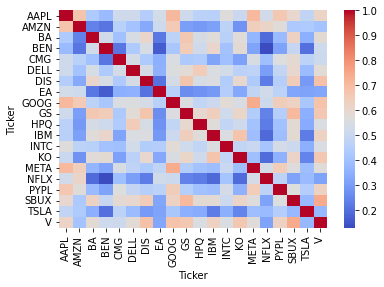

In [17]:
#visualizing the matrix

sns.heatmap(similarity_matrix
            , cmap ='coolwarm')
plt.show()

In [4]:
#Creating a function to map sets of symmetric matrices

#function 1: to find the indices of along a diagnal, 0 is for the main diagnal and a positive is for a diagnal up 

def matrix_diagonal_indexes(diagonal:int, n:int):
    """Provides indexes corresponding to the elements along the diagonal of a matrix of size n.

    Example:
    d = matrix_diagonal_indexes(1, 3)
    >>> d
    array([[0., 1.],
          [1., 2.]])
    """
    assert(abs(diagonal) < n)

    diagonal_indexes = np.zeros((n-diagonal, 2))
    for i in range(n - diagonal):
        diagonal_indexes[i, 0] = i
        diagonal_indexes[i, 1] = i + diagonal

    return diagonal_indexes


def upper_triangle_indexes(n:int):
    """Provides all indexes of the upper triangle of a matrix of shape n, in snake diagonal order.

    Example:
    >>> indexes = upper_triangle_indexes(3)
    >>> indexes
    array([[0, 1],
           [1, 2],
           [0, 2]])
    """
    indexes = np.zeros((int(n*(n-1)/2), 2), dtype=int)
    start_idx = 0
    for diagonal in range(1, n):
        diagonal_indexes = matrix_diagonal_indexes(diagonal, n)
        indexes[start_idx:start_idx+len(diagonal_indexes)] = diagonal_indexes
        start_idx += len(diagonal_indexes)
    return indexes

In [5]:
matrix_diagonal_indexes(1,5)

array([[0., 1.],
       [1., 2.],
       [2., 3.],
       [3., 4.]])

In [20]:
similarity_matrix.shape

(20, 20)

In [25]:
def make_doubly_stochastic(matrix, max_iter=1000, tol=1e-10):
    n, m = matrix.shape
    assert n == m, "Matrix must be square"

    doubly_stochastic = matrix.copy()
    upper_tri_indexes = upper_triangle_indexes(n)

    for _ in range(max_iter):
        row_sums = doubly_stochastic.sum(axis=1)  
        row_normalization = np.diag(1.0 / row_sums)  
        doubly_stochastic = row_normalization @ doubly_stochastic  
        # Column normalization
        col_sums = doubly_stochastic.sum(axis=0)  
        col_normalization = np.diag(1.0 / col_sums)  
        doubly_stochastic = doubly_stochastic @ col_normalization  

        for i, j in upper_tri_indexes:
            doubly_stochastic[i, j] = doubly_stochastic[j, i] = (doubly_stochastic[i, j] + doubly_stochastic[j, i]) / 2

        if np.all(np.abs(doubly_stochastic.sum(axis=1) - 1) < tol) and np.all(np.abs(doubly_stochastic.sum(axis=0) - 1) < tol):
            break

    return doubly_stochastic